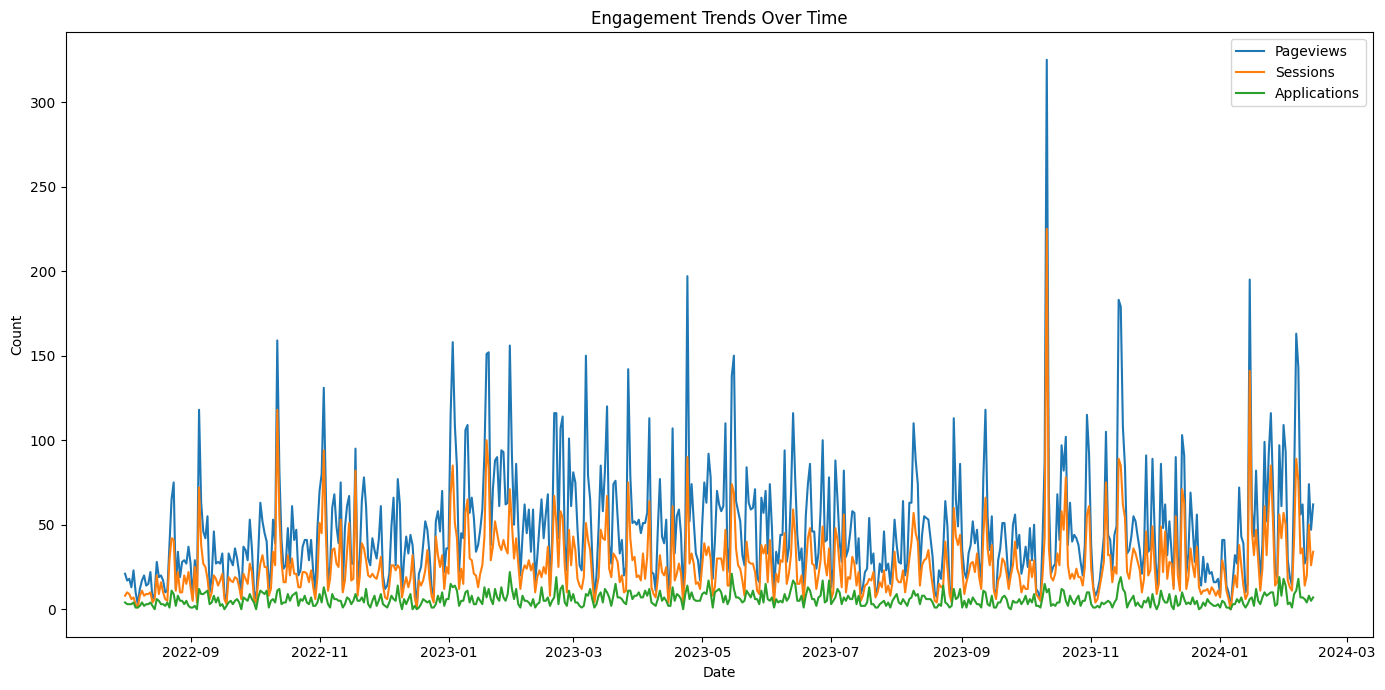

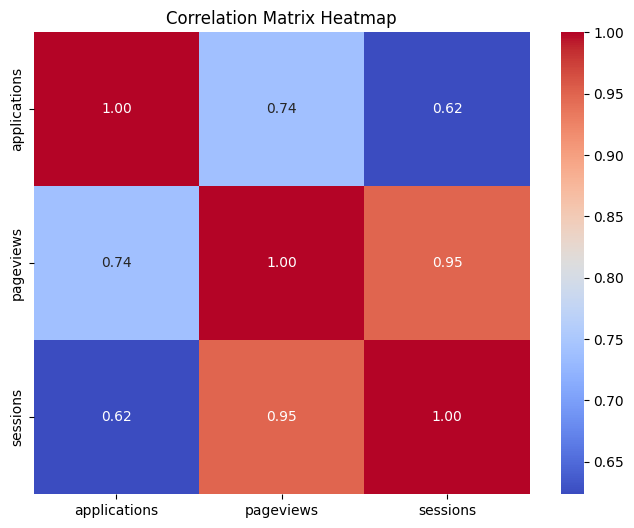

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'visitors-20220801-20240214.csv'  # Update with the actual path
data = pd.read_csv(file_path)

# Combine day, month, and year into a single datetime column for easier analysis
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Drop unnecessary columns
data = data.drop(columns=['isoYear', 'uniquePageviews', 'day', 'month', 'year'])

# Plotting trends over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='date', y='pageviews', label='Pageviews')
sns.lineplot(data=data, x='date', y='sessions', label='Sessions')
sns.lineplot(data=data, x='date', y='applications', label='Applications')
plt.title('Engagement Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()

# Generate the correlation matrix
correlation_matrix = data[['applications', 'pageviews', 'sessions']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


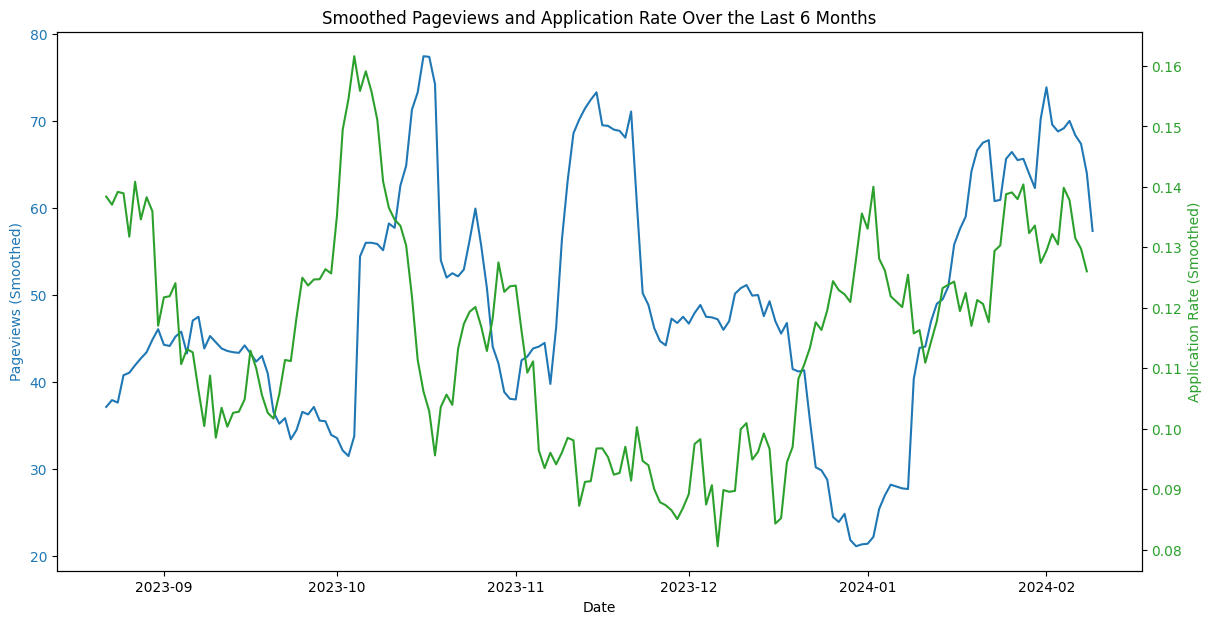

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'visitors-20220801-20240214.csv'  # Update with the actual path
data = pd.read_csv(file_path)

# Combine day, month, and year into a single datetime column for easier analysis
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Drop unnecessary columns
data = data.drop(columns=['isoYear', 'uniquePageviews', 'day', 'month', 'year'])

# Calculate the application rate as applications per pageview
data['application_rate'] = data['applications'] / data['pageviews']

# Filter for the last 6 months and create a copy of the slice to avoid SettingWithCopyWarning
last_date = data['date'].max()
six_months_ago = last_date - pd.DateOffset(months=6)
data_last_6_months = data[data['date'] > six_months_ago].copy()  # Using .copy() here

# Apply a 14-day rolling average to smooth the pageviews and application rate
data_last_6_months['pageviews_smoothed'] = data_last_6_months['pageviews'].rolling(window=14, center=True).mean()
data_last_6_months['application_rate_smoothed'] = data_last_6_months['application_rate'].rolling(window=14, center=True).mean()

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.set_xlabel('Date')
ax1.set_ylabel('Pageviews (Smoothed)', color='tab:blue')
ax1.plot(data_last_6_months['date'], data_last_6_months['pageviews_smoothed'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Application Rate (Smoothed)', color='tab:green')
ax2.plot(data_last_6_months['date'], data_last_6_months['application_rate_smoothed'], color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('Smoothed Pageviews and Application Rate Over the Last 6 Months')
plt.show()

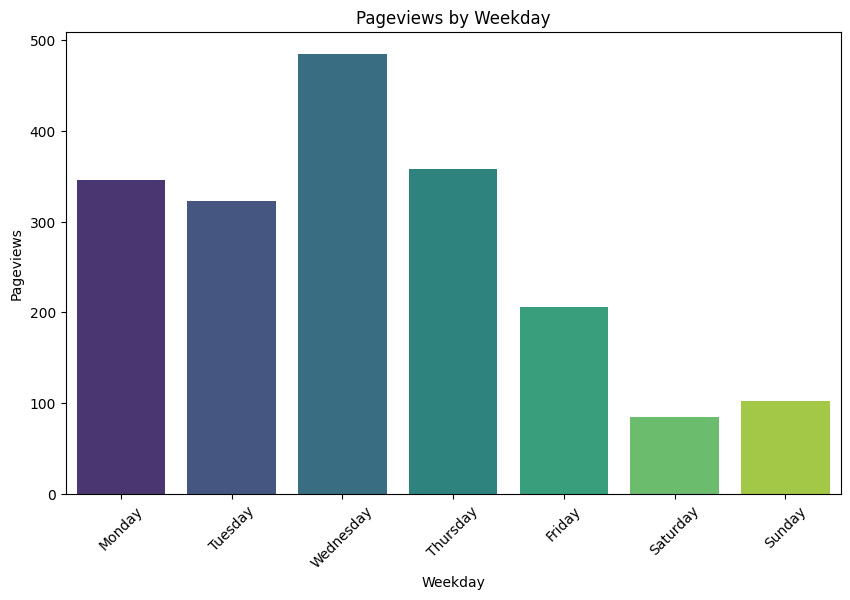

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'visitors-20240119-20240215.csv'  # Adjust the path as needed
data = pd.read_csv(file_path)

# Combine day, month, and year into a single datetime column for easier analysis
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Adding a column for the weekday name
data['weekday'] = data['date'].dt.day_name()

# Grouping the data by the weekday and summing the pageviews for each day
weekday_views = data.groupby('weekday')['pageviews'].sum().reset_index()

# Sorting the weekday_views DataFrame by the order of the week for better visualization
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_views['weekday'] = pd.Categorical(weekday_views['weekday'], categories=weekday_order, ordered=True)
weekday_views_sorted = weekday_views.sort_values('weekday')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_views_sorted, x='weekday', y='pageviews', palette='viridis')
plt.title('Pageviews by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Pageviews')
plt.xticks(rotation=45)
plt.show()


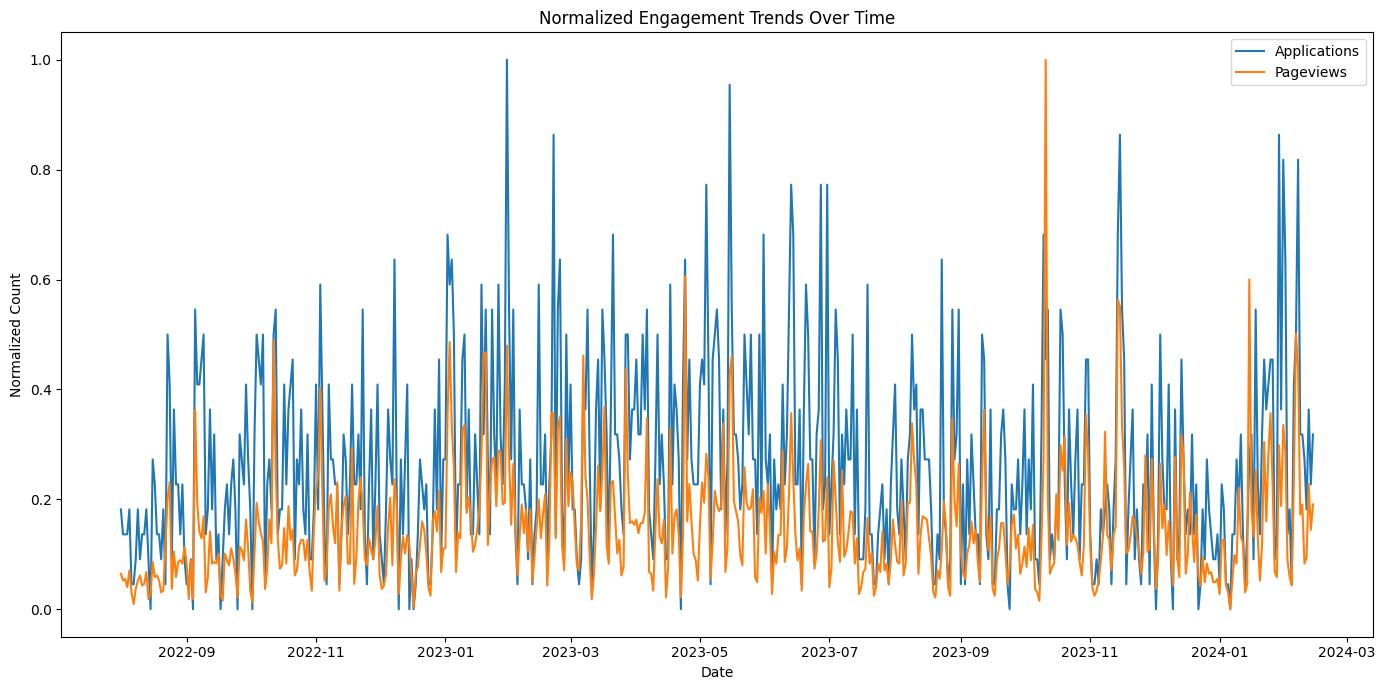

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Selecting the columns to normalize
columns_to_normalize = ['applications', 'pageviews']

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Fitting the scaler and transforming the data
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Plotting the normalized trends over time
plt.figure(figsize=(14, 7))
for column in columns_to_normalize:
    sns.lineplot(data=data, x='date', y=column, label=column.capitalize())
plt.title('Normalized Engagement Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Count')
plt.legend()
plt.tight_layout()

# Showing the plot
plt.show()



In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'visitors-20220801-20240214.csv'  # Adjust this path to your dataset location
data = pd.read_csv(file_path)

# Combine day, month, and year into a single datetime column for easier analysis
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data = data.drop(columns=['isoYear', 'uniquePageviews', 'day', 'month', 'year', 'connections', 'isoWeek', 'isoYearIsoWeek'])

# Convert dates into a numerical format for model training
data['date_ordinal'] = data['date'].apply(lambda x: x.toordinal())

# Predicting pageviews and applications for the next week requires creating future date ordinals
last_date = data['date'].max()
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, 8)]
future_date_ordinals = [d.toordinal() for d in future_dates]

# Features and targets
X = data['date_ordinal'].values.reshape(-1, 1)  # Features
y_pageviews = data['pageviews'].values  # Target for pageviews
y_applications = data['applications'].values  # Target for applications

# Training the models
model_pageviews = LinearRegression().fit(X, y_pageviews)
model_applications = LinearRegression().fit(X, y_applications)

# Making predictions for the next week
predictions_pageviews = model_pageviews.predict(np.array(future_date_ordinals).reshape(-1, 1))
predictions_applications = model_applications.predict(np.array(future_date_ordinals).reshape(-1, 1))

# Creating a DataFrame to save the predictions
predictions_df = pd.DataFrame({
    'date': future_dates,
    'predicted_pageviews': predictions_pageviews,
    'predicted_applications': predictions_applications
})

# Save the predictions to a CSV file
predictions_file_path = 'predicted_pageviews_applications_next_week.csv'
predictions_df.to_csv(predictions_file_path, index=False)

print(f"Predictions saved to {predictions_file_path}")


Predictions saved to predicted_pageviews_applications_next_week.csv


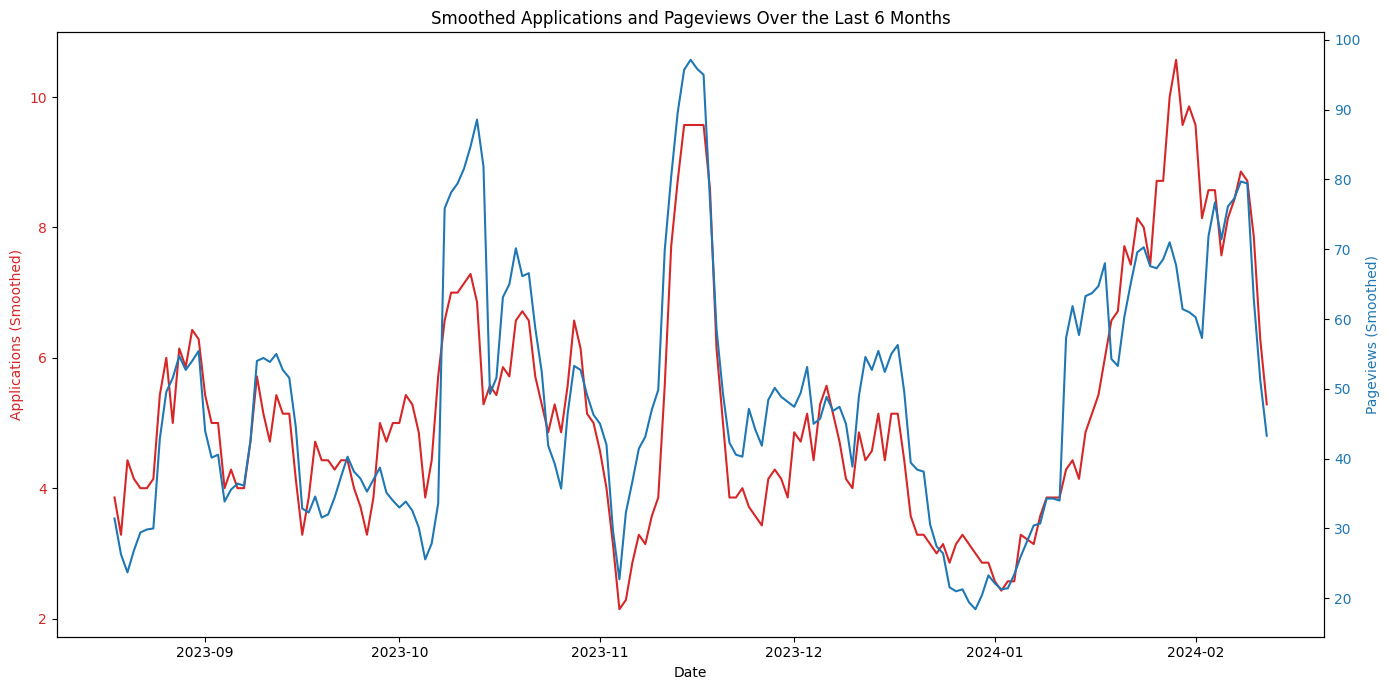

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data has already been loaded into 'data' DataFrame
# Load the dataset
file_path = 'visitors-20220801-20240214.csv'  # Update with the actual path
data = pd.read_csv(file_path)

# Combine day, month, and year into a single datetime column for easier analysis
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Drop unnecessary columns
data = data.drop(columns=['isoYear', 'uniquePageviews', 'day', 'month', 'year', 'connections', 'isoWeek', 'isoYearIsoWeek'])

# Filter for the last 6 months
last_date = data['date'].max()
six_months_ago = last_date - pd.DateOffset(months=6)
data_last_6_months = data[data['date'] > six_months_ago].copy()  # Using .copy() to avoid SettingWithCopyWarning

# Applying a 7-day rolling average to both applications and pageviews for smoother trends
data_last_6_months['applications_smoothed'] = data_last_6_months['applications'].rolling(window=7, center=True).mean()
data_last_6_months['pageviews_smoothed'] = data_last_6_months['pageviews'].rolling(window=7, center=True).mean()

# Plotting the smoothed applications and pageviews over the last 6 months
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot smoothed applications on the left y-axis
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Applications (Smoothed)', color=color)
ax1.plot(data_last_6_months['date'], data_last_6_months['applications_smoothed'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for smoothed pageviews
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Pageviews (Smoothed)', color=color)
ax2.plot(data_last_6_months['date'], data_last_6_months['pageviews_smoothed'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Smoothed Applications and Pageviews Over the Last 6 Months')
fig.tight_layout()
plt.show()
